In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\gagan soni\Downloads\diabetes dataset.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.Pregnancies.unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14],
      dtype=int64)

In [5]:
df.Outcome.unique()

array([1, 0], dtype=int64)

In [6]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
continious = ['Glucose','BloodPressure','Glucose','SkinThickness','Insulin','BMI'
              ,'DiabetesPedigreeFunction','Age']
count = ['Pregnancies']
discrete_categorical = ['Outcome']

In [9]:
df[continious].describe()

,Glucose,BloodPressure,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,120.894531,69.105469,120.894531,20.536458,79.799479,31.992578,0.471876,33.240885
std,31.972618,19.355807,31.972618,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,99.000000,62.000000,99.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,117.000000,72.000000,117.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,140.250000,80.000000,140.250000,32.000000,127.250000,36.600000,0.626250,41.000000
max,199.000000,122.000000,199.000000,99.000000,846.000000,67.100000,2.420000,81.000000


<Axes: >

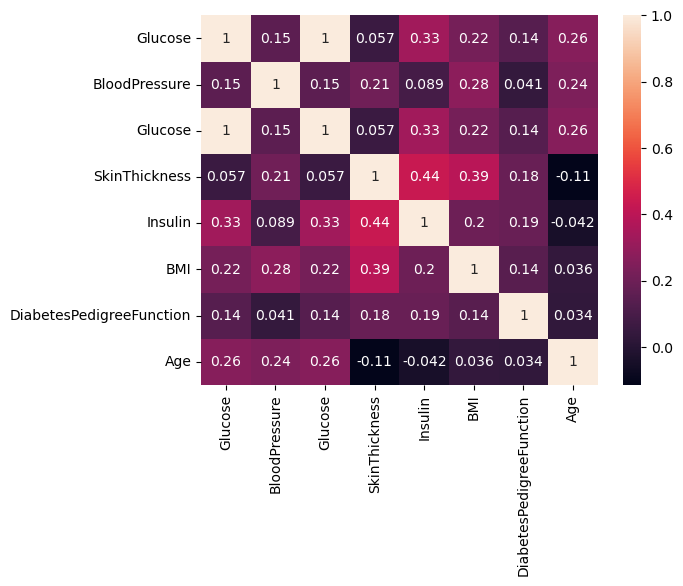

In [10]:
sns.heatmap(df[continious].corr(),annot = True) # check colinierity problem 

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Data wrangling

In [12]:
# no data wrangling is require 

### Train test split 

In [13]:
X = df.drop('Outcome',axis = 1)
y = df['Outcome']

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 42)

# Modelling

In [15]:
from sklearn.linear_model import LogisticRegression 
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)

LogisticRegression()

In [16]:
log_reg.coef_

array([[ 0.06634256,  0.03391119, -0.01378097,  0.00414052, -0.00180641,
         0.10109421,  0.61906   ,  0.03470224]])

In [17]:
log_reg.intercept_

array([-8.87761736])

In [18]:
y_pred_train = log_reg.predict(X_train)

In [19]:
from sklearn.metrics import accuracy_score
print('train accuracy',accuracy_score(y_train , y_pred_train))

train accuracy 0.7719869706840391


In [20]:
from sklearn.model_selection import cross_val_score 
print('cross val score ',cross_val_score(log_reg,X_train , y_train , cv = 5 ).mean())

cross val score  0.7720111955217913


In [21]:
y_pred_test = log_reg.predict(X_test)
print('test accuracy',accuracy_score(y_test,y_pred_test))

test accuracy 0.7467532467532467


### confusion metrics 

In [22]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_test)
cm

array([[78, 21],
       [18, 37]], dtype=int64)

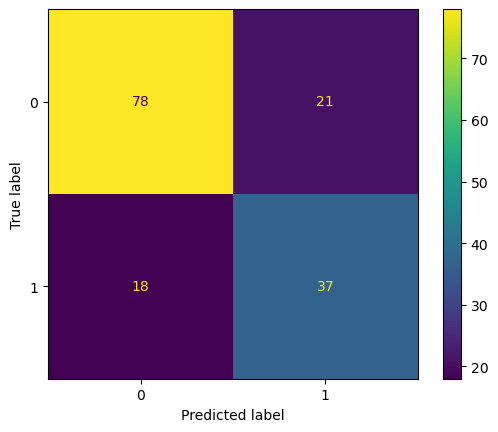

In [23]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay(cm,display_labels = [0,1]).plot()
plt.show()

### classification Report 

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_test)) 

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



### ROC curv

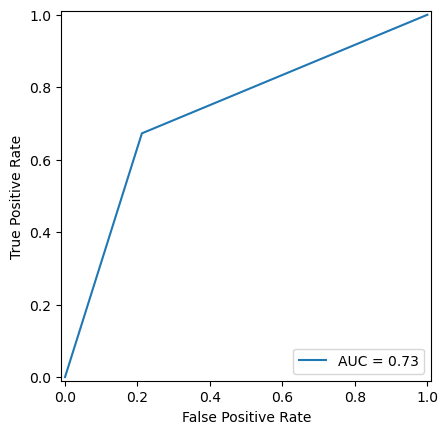

In [25]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
fpr, tpr, threshold = roc_curve(y_test,y_pred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr = fpr,tpr = tpr,roc_auc = roc_auc).plot()
plt.show()

In [26]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_test)

0.7303030303030302